In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import lightgbm as lgb
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor

### 데이터 개수
- 2016 : 25653
- 2017 : 25197
- 2018 : 25495

### 결측치
- Y 데이터에 -9999.xx인 값은 결측치에 해당한다.

In [3]:
base = os.path.join(os.getcwd(), 'data', 'train')

In [4]:
color_map = plt.cm.get_cmap('RdBu')
color_map = color_map.reversed()

def visual(indexs):
    files = os.listdir(base)
    size = len(indexs)
    
    for i, index in enumerate(indexs):
        plt.style.use('fivethirtyeight')
        plt.figure(figsize=(30, 30))
        
        data = np.load(os.path.join(base, files[index]))

        for j in range(15):
            plt.subplot(size, 15, j+1)
            plt.imshow(data[:, :, j], cmap=color_map)

    plt.show()

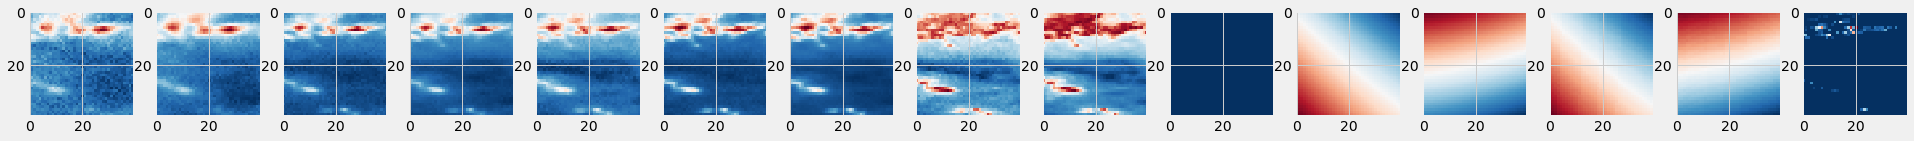

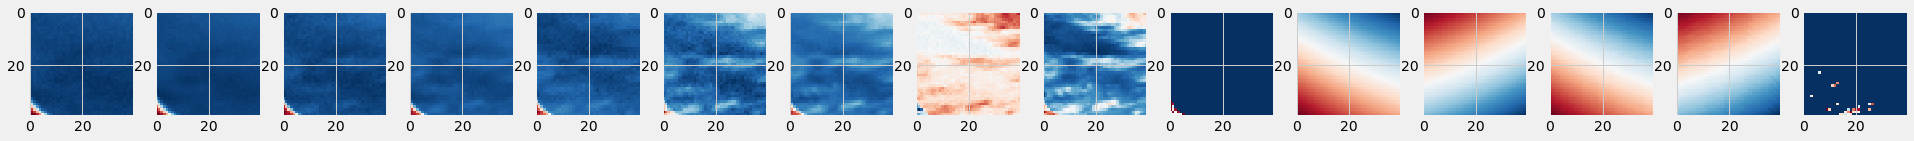

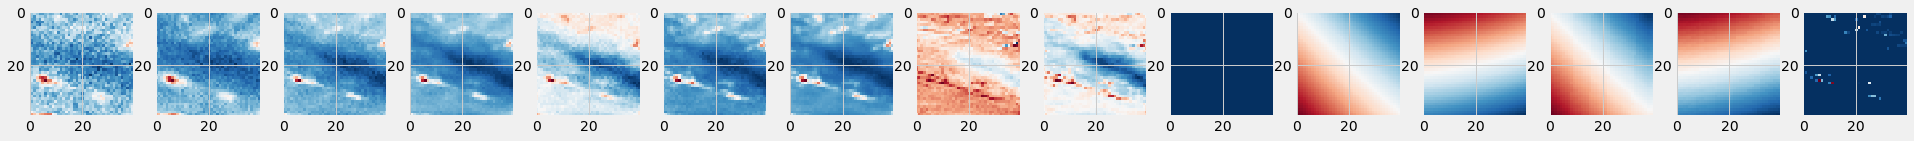

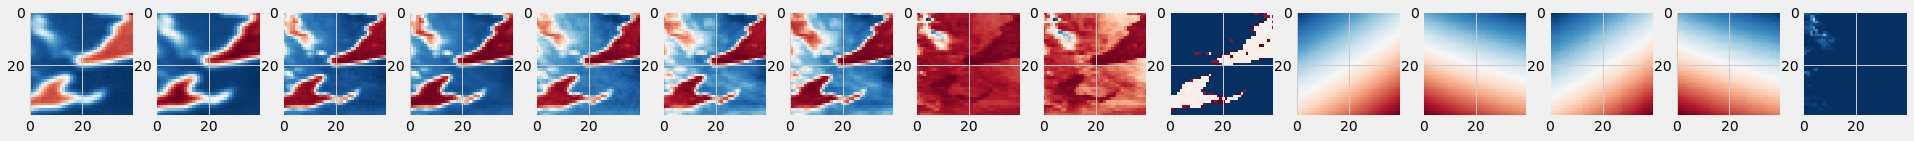

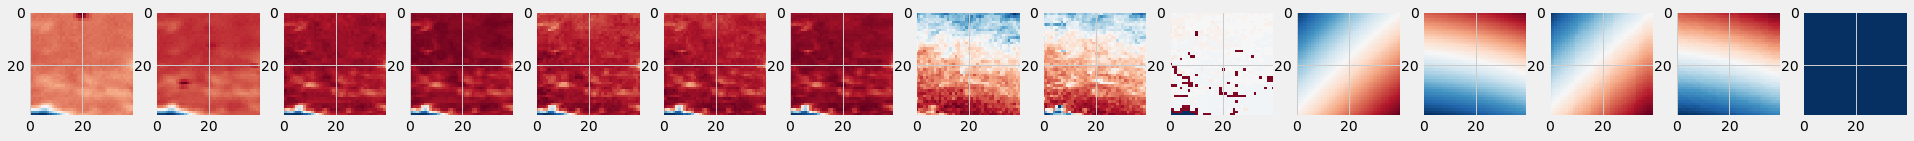

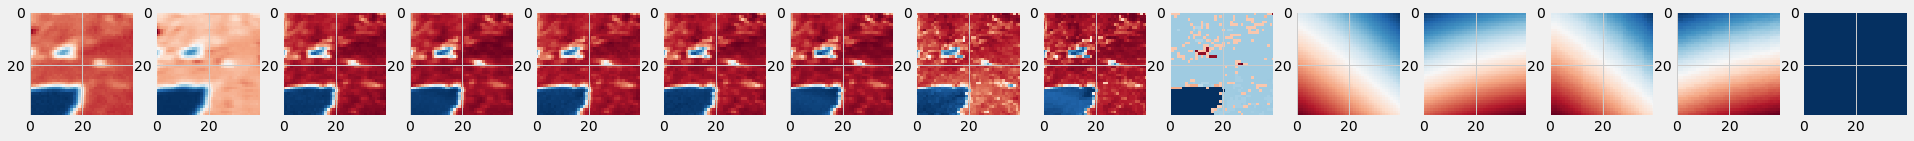

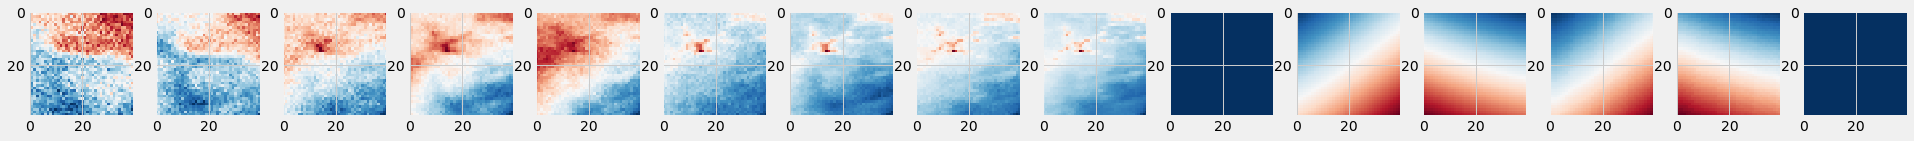

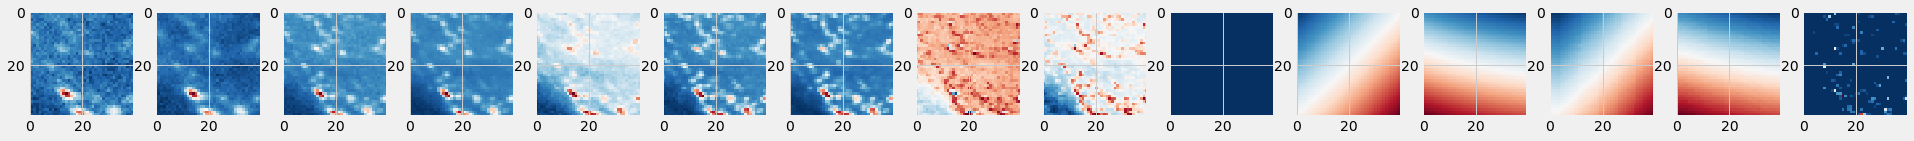

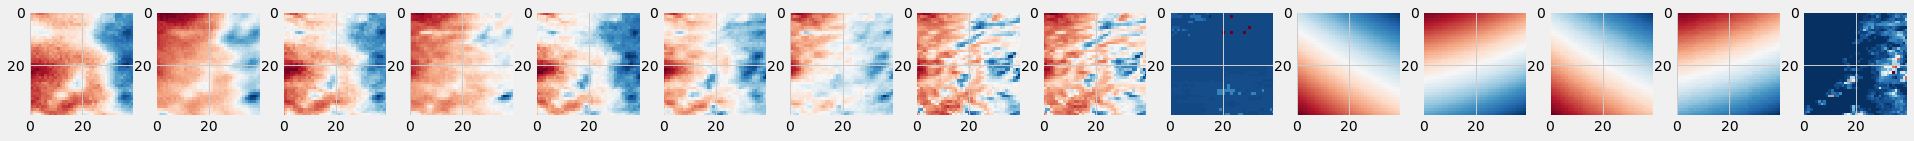

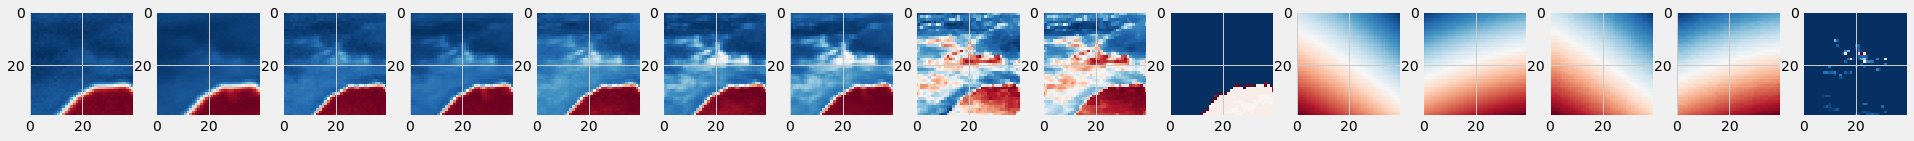

In [9]:
visual(np.random.choice(range(len(datas)), 10))

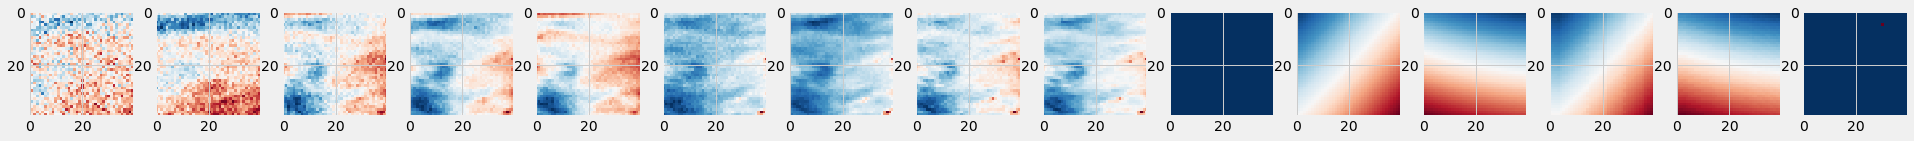

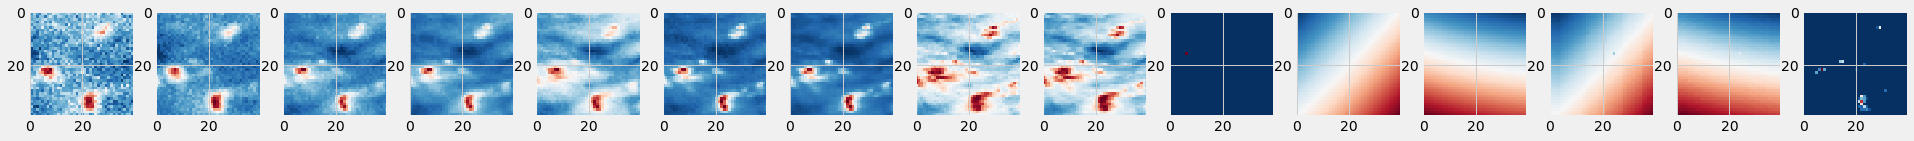

In [10]:
visual([0, 1])